<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/K_Nearest_Neighbors_(KNN)_ObesityClassificationdataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
obesity_df = pd.read_csv('/content/drive/My Drive/knndataset/ObesityClassification.csv')
obesity_df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


The Obesity Classification dataset contains numerical features (Age, Height, Weight, BMI) and categorical ones (Gender, Label). The target column is Label, representing different obesity categories.

Steps for KNN Modeling:
Drop the ID column.

Encode categorical features (Gender, Label).

Scale the features.

Apply PCA.

Train and evaluate KNN.

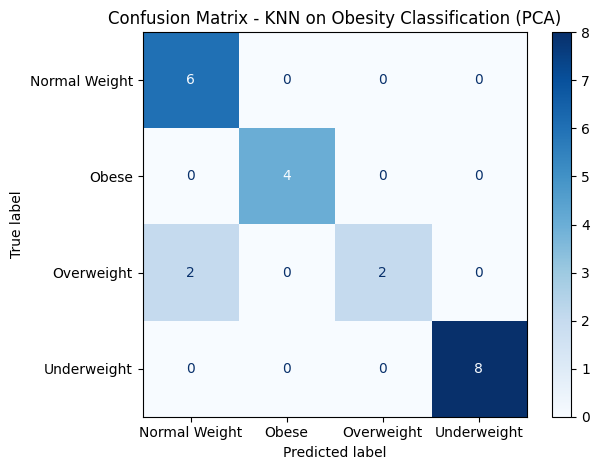

('               precision    recall  f1-score   support\n\nNormal Weight       0.75      1.00      0.86         6\n        Obese       1.00      1.00      1.00         4\n   Overweight       1.00      0.50      0.67         4\n  Underweight       1.00      1.00      1.00         8\n\n     accuracy                           0.91        22\n    macro avg       0.94      0.88      0.88        22\n weighted avg       0.93      0.91      0.90        22\n',
 0.9090909090909091,
 0.9318181818181818,
 0.9090909090909091,
 0.9004329004329005)

In [7]:
# Step 1: Drop the ID column
obesity_df_clean = obesity_df.drop(columns=["ID"])

# Step 2: Encode categorical variables
obesity_df_encoded = obesity_df_clean.copy()
label_encoders = {}

for col in ["Gender", "Label"]:
    le = LabelEncoder()
    obesity_df_encoded[col] = le.fit_transform(obesity_df_encoded[col])
    label_encoders[col] = le

# Step 3: Define features and target
X_obesity = obesity_df_encoded.drop("Label", axis=1)
y_obesity = obesity_df_encoded["Label"]

# Step 4: Scale features
scaler = StandardScaler()
X_obesity_scaled = scaler.fit_transform(X_obesity)

# Step 5: Apply PCA
pca = PCA(n_components=2, random_state=42)
X_obesity_pca = pca.fit_transform(X_obesity_scaled)

# Step 6: Train-test split
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_obesity_pca, y_obesity, test_size=0.2, random_state=42)

# Step 7: Train KNN model
knn_obesity = KNeighborsClassifier(n_neighbors=5)
knn_obesity.fit(Xo_train, yo_train)

# Step 8: Predictions and evaluation
yo_pred = knn_obesity.predict(Xo_test)
acc = accuracy_score(yo_test, yo_pred)
prec = precision_score(yo_test, yo_pred, average="weighted", zero_division=0)
rec = recall_score(yo_test, yo_pred, average="weighted")
f1 = f1_score(yo_test, yo_pred, average="weighted")
report = classification_report(yo_test, yo_pred, target_names=label_encoders["Label"].classes_)
cm = confusion_matrix(yo_test, yo_pred)

# Step 9: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders["Label"].classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN on Obesity Classification (PCA)")
plt.tight_layout()
plt.show()

report, acc, prec, rec, f1


KNN Evaluation on Obesity Classification Dataset (PCA-reduced)
Accuracy: 91%

Precision (weighted): 93.18%

Recall (weighted): 91%

F1-score (weighted): 90.04%

Confusion Matrix Insights:
The model performs perfectly on Obese and Underweight.

Some misclassification observed in the Overweight category.

The model is quite effective even with just 2 PCA components, indicating strong feature separability.

Further tuning k and check accuracy

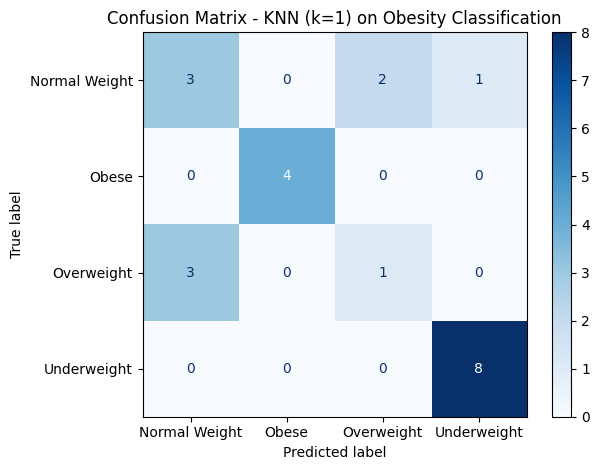

(1,
 '               precision    recall  f1-score   support\n\nNormal Weight       0.50      0.50      0.50         6\n        Obese       1.00      1.00      1.00         4\n   Overweight       0.33      0.25      0.29         4\n  Underweight       0.89      1.00      0.94         8\n\n     accuracy                           0.73        22\n    macro avg       0.68      0.69      0.68        22\n weighted avg       0.70      0.73      0.71        22\n',
 0.7272727272727273,
 0.702020202020202,
 0.7272727272727273,
 0.712375859434683)

In [9]:
# Step 1: Set up a range of k values
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 21))

# Step 2: Perform cross-validation to find the best k
param_grid = {'n_neighbors': k_range}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(Xo_train, yo_train)

# Step 3: Retrieve best k and evaluate on test set
best_k = grid.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(Xo_train, yo_train)

yo_pred_best = knn_best.predict(Xo_test)
acc_best = accuracy_score(yo_test, yo_pred_best)
prec_best = precision_score(yo_test, yo_pred_best, average="weighted", zero_division=0)
rec_best = recall_score(yo_test, yo_pred_best, average="weighted")
f1_best = f1_score(yo_test, yo_pred_best, average="weighted")
report_best = classification_report(yo_test, yo_pred_best, target_names=label_encoders["Label"].classes_)
cm_best = confusion_matrix(yo_test, yo_pred_best)

# Step 4: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=label_encoders["Label"].classes_)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - KNN (k={best_k}) on Obesity Classification")
plt.tight_layout()
plt.show()

best_k, report_best, acc_best, prec_best, rec_best, f1_best



Accuracy is affected with further tuning